<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Using baseband processing, obtain the BER (bit error rate) vs. SNR plots for

* BPSK
* QPSK
* 8-PSK
* 16-QAM
* 64-QAM 

by averaging over a 10,000 transmitted symbols each. 

In [ ]:
t_symb_num = np.int32(1e4)

## BPSK

In [ ]:
num_symbs = 2

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

t_bit_num = np.int32(bits_per_symbol * t_symb_num)
print(f"Number of random bits: {t_bit_num}")

bitstream = np.random.randint(low=0, high=2, size=(t_bit_num, ))
print(f"Length of bitstream: {len(bitstream)}")

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Number of random bits: 10000
Length of bitstream: 10000
Constillations: [(1+0j), (-1+1.2246467991473532e-16j)]


In [ ]:
example = np.asarray([0,1,2,3,4,5]).reshape(-1, 2)
example

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
def calc_power(A):
  return np.mean(np.square(np.abs(A)))

In [ ]:
def bit_to_symbol(bitstream, bits_per_symbol, cons):
  # for i in range(0, len(bitstream), bits_per_symbol):
  #   m=0
  #   for j in range(bits_per_symbol):
  #     m = 2 * m + bitstream[i+j]
  #   sym_stream.append(cons[m])
  cons = np.asarray(cons)
  bitstream = bitstream.reshape(-1, bits_per_symbol)
  val_stream = np.zeros((bitstream.shape[0],))
  for i in range(bits_per_symbol):
     val_stream = 2 * val_stream + bitstream[:,i]
  sym_stream = cons[np.int32(val_stream)]
  return sym_stream

sym_stream = bit_to_symbol(bitstream, bits_per_symbol, cons)
print(sym_stream)

[-1.+1.2246468e-16j -1.+1.2246468e-16j  1.+0.0000000e+00j ...
  1.+0.0000000e+00j -1.+1.2246468e-16j  1.+0.0000000e+00j]


In [ ]:
def create_noise(lamda, size = t_symb_num):
  noise_real = np.random.randn(size)
  noise_img = np.random.randn(size)
  noise = noise_real + 1j * noise_img
  noise = np.asarray(noise, dtype=np.complex)
  noise = noise * lamda 
  return noise 

noise = create_noise(1/np.sqrt(2))
print(noise[0])

(-0.7914168897541+0.5215383117164647j)


In [ ]:
r = sym_stream + noise
print(r)

[-1.79141689+0.52153831j -0.81631567+1.15771681j  1.86849081-1.49850153j
 ...  0.03451023+0.31336013j -1.88052729+0.02006807j
  2.08716996-0.24039041j]


In [ ]:
def process(r, cons):
  pred = np.zeros_like(r, dtype=np.complex)
  
  # for i in range(len(r)):
  #   dist = [np.linalg.norm(r[i]-j) for j in cons]
  #   symb = np.argmin(dist)
  #   pred[i] = cons[symb]
  
  cons = np.asarray(cons)
  cons_mat = np.repeat(np.asarray(cons).reshape(-1,1), len(r), axis=-1)
  cons_mat = cons_mat - r
  norm_mat = np.abs(cons_mat)
  pred = np.argmin(norm_mat, axis=0)
  pred = cons[pred]

  return pred

pred = process(r,cons)
pred

array([-1.+1.2246468e-16j, -1.+1.2246468e-16j,  1.+0.0000000e+00j, ...,
        1.+0.0000000e+00j, -1.+1.2246468e-16j,  1.+0.0000000e+00j])

In [ ]:
def calc_BER(pred, sym_stream):
  err = [(0 if pred[i]==sym_stream[i] else 1) for i in range(len(sym_stream))]
  BER = np.mean(err)
  return BER
BER = calc_BER(pred, sym_stream)
print(f"BER: {BER}")

BER: 0.0778


In [ ]:
sig_power = calc_power(cons)
noise_power = calc_power(noise)
SNR = sig_power/noise_power
print(f"SNR: {SNR}")

SNR: 0.9917947262968881


### One function to Rule them All! 

In [ ]:
def ber_snr(bitstream, bits_per_symbol,  cons, eta):
  
  sym_stream = bit_to_symbol(bitstream, bits_per_symbol, cons)
  noise = create_noise(eta)
  r = sym_stream + noise
  pred = process(r, cons)
  BER = calc_BER(pred, sym_stream)
  
  sig_power = calc_power(cons)
  noise_power = calc_power(noise)
  SNR = sig_power/noise_power

  return BER, SNR

In [ ]:
ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta= (1/np.sqrt(2)))
print(f"BER: {ber}\nSNR: {snr}")

BER: 0.0774
SNR: 1.0052655834439033


In [ ]:
eta_arr = np.arange(0.1, 2.1, 0.1)
eta_arr

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
ber_arr = []
snr_arr = []
for eta in eta_arr:
  ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta)
  ber_arr.append(ber)
  snr_arr.append(snr)

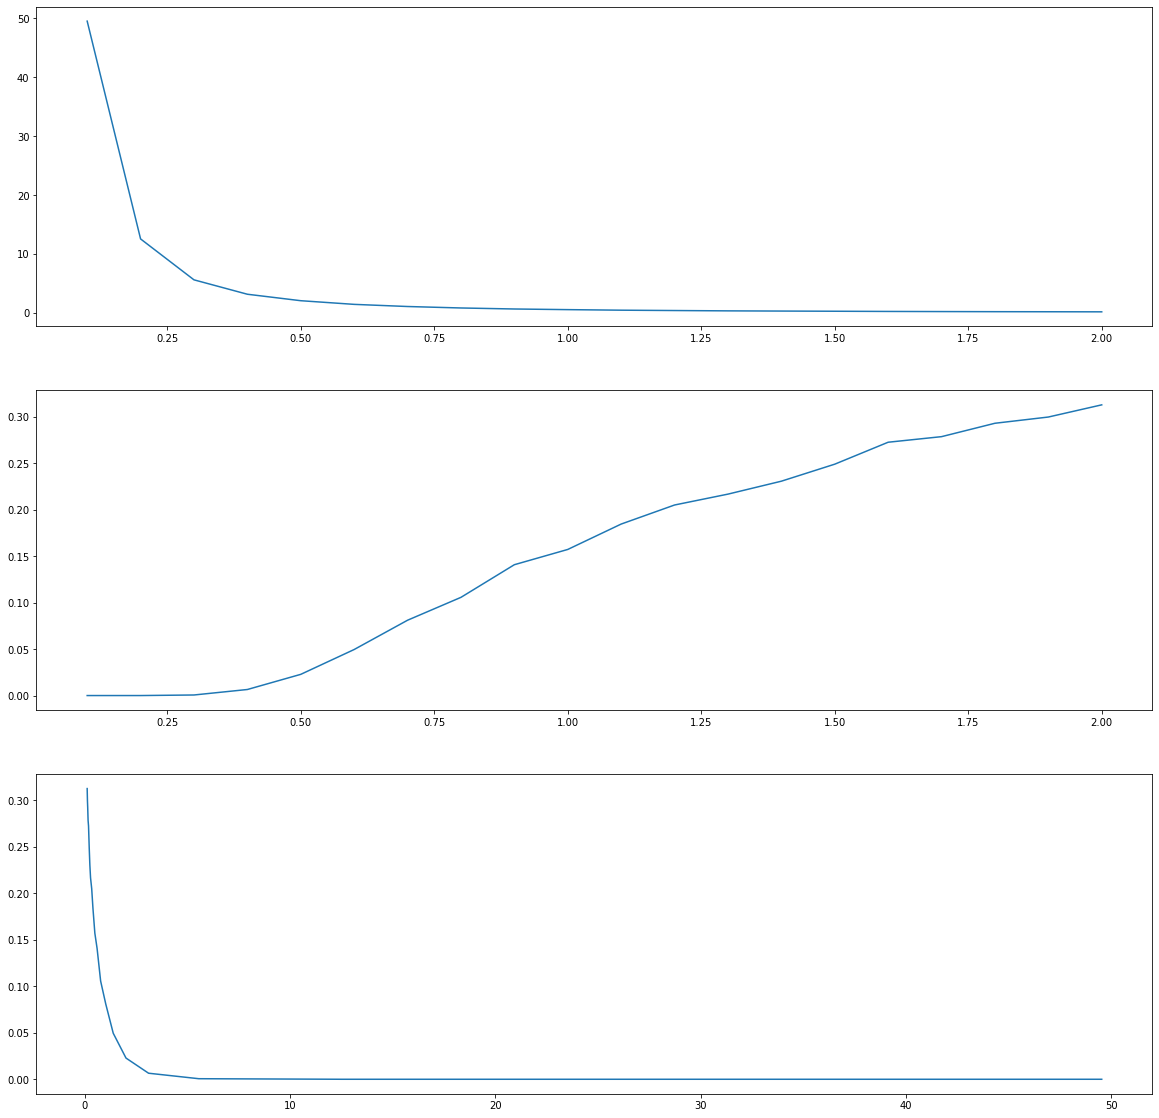

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, ber_arr)

plt.subplot(313)
plt.plot(snr_arr, ber_arr)

## QPSK

In [ ]:
num_symbs = 4

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

t_bit_num = np.int32(bits_per_symbol * t_symb_num)
print(f"Number of random bits: {t_bit_num}")

bitstream = np.random.randint(low=0, high=2, size=(t_bit_num, ))
print(f"Length of bitstream: {len(bitstream)}")

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Number of random bits: 20000
Length of bitstream: 20000
Constillations: [(1+0j), (6.123233995736766e-17+1j), (-1+1.2246467991473532e-16j), (-1.8369701987210297e-16-1j)]


In [ ]:
ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta= (1/np.sqrt(2)))
print(f"BER: {ber}\nSNR: {snr}")

BER: 0.2924
SNR: 1.0120530170053763


In [ ]:
eta_arr = np.arange(0.1, 2.1, 0.1)
eta_arr

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
ber_arr = []
snr_arr = []
for eta in eta_arr:
  ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta)
  ber_arr.append(ber)
  snr_arr.append(snr)

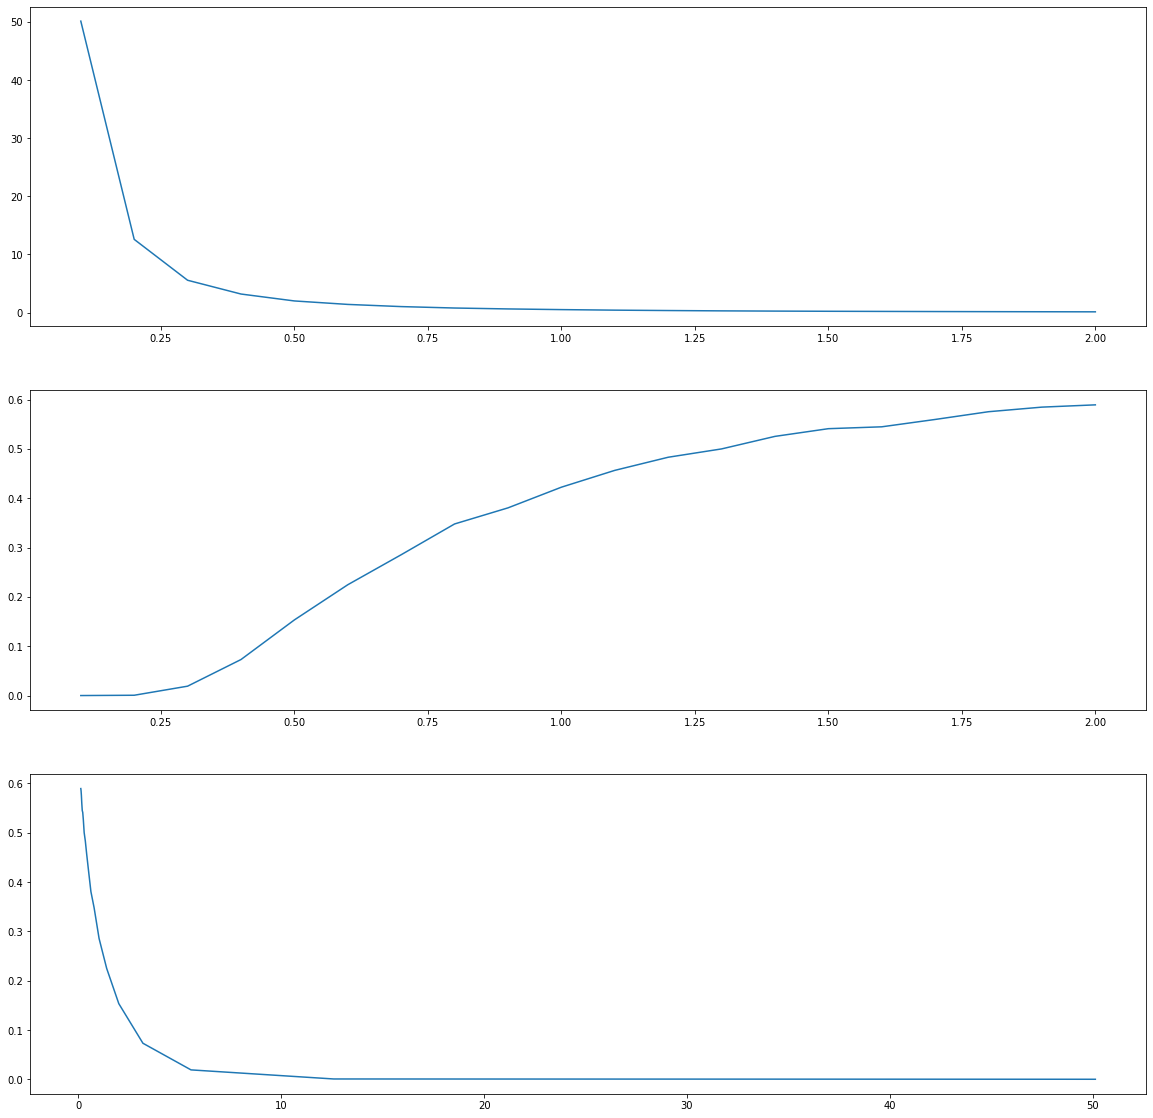

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, ber_arr)

plt.subplot(313)
plt.plot(snr_arr, ber_arr)

## 8-PSK

In [ ]:
num_symbs = 8

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

t_bit_num = np.int32(bits_per_symbol * t_symb_num)
print(f"Number of random bits: {t_bit_num}")

bitstream = np.random.randint(low=0, high=2, size=(t_bit_num, ))
print(f"Length of bitstream: {len(bitstream)}")

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Number of random bits: 30000
Length of bitstream: 30000
Constillations: [(1+0j), (0.7071067811865476+0.7071067811865475j), (6.123233995736766e-17+1j), (-0.7071067811865475+0.7071067811865476j), (-1+1.2246467991473532e-16j), (-0.7071067811865477-0.7071067811865475j), (-1.8369701987210297e-16-1j), (0.7071067811865474-0.7071067811865477j)]


In [ ]:
ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta= (1/np.sqrt(2)))
print(f"BER: {ber}\nSNR: {snr}")

BER: 0.5818
SNR: 1.0021686293387941


In [ ]:
eta_arr = np.arange(0.1, 2.1, 0.1)
eta_arr

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
ber_arr = []
snr_arr = []
for eta in eta_arr:
  ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta)
  ber_arr.append(ber)
  snr_arr.append(snr)

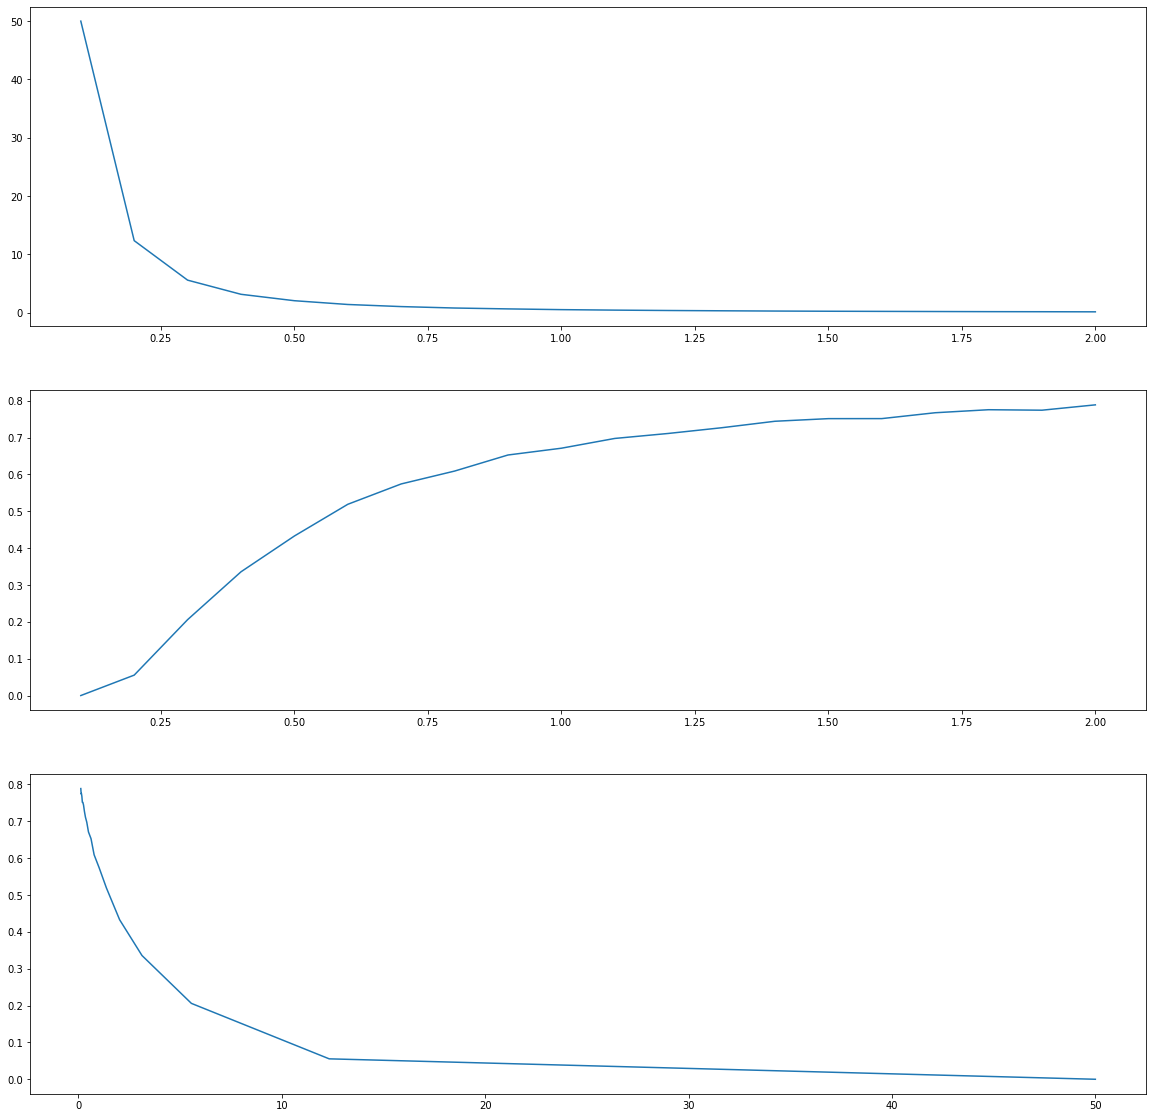

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, ber_arr)

plt.subplot(313)
plt.plot(snr_arr, ber_arr)

## 16-QAM

In [ ]:
num_symbs = 16

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

t_bit_num = np.int32(bits_per_symbol * t_symb_num)
print(f"Number of random bits: {t_bit_num}")

bitstream = np.random.randint(low=0, high=2, size=(t_bit_num, ))
print(f"Length of bitstream: {len(bitstream)}")

# for square QAM
x_pts = 8
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

cons = [(real + 1j * img)  for real in Ami for img in Amq]
print(f"Constillations: {cons}")

Number of random bits: 40000
Length of bitstream: 40000
Constillations: [(-7-1j), (-7+1j), (-5-1j), (-5+1j), (-3-1j), (-3+1j), (-1-1j), (-1+1j), (1-1j), (1+1j), (3-1j), (3+1j), (5-1j), (5+1j), (7-1j), (7+1j)]


In [ ]:
ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta= (1/np.sqrt(2)))
print(f"BER: {ber}\nSNR: {snr}")

BER: 0.2124
SNR: 21.76615041723054


In [ ]:
eta_arr = np.arange(0.1, 2.1, 0.1)
eta_arr

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
ber_arr = []
snr_arr = []
for eta in eta_arr:
  ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta)
  ber_arr.append(ber)
  snr_arr.append(snr)

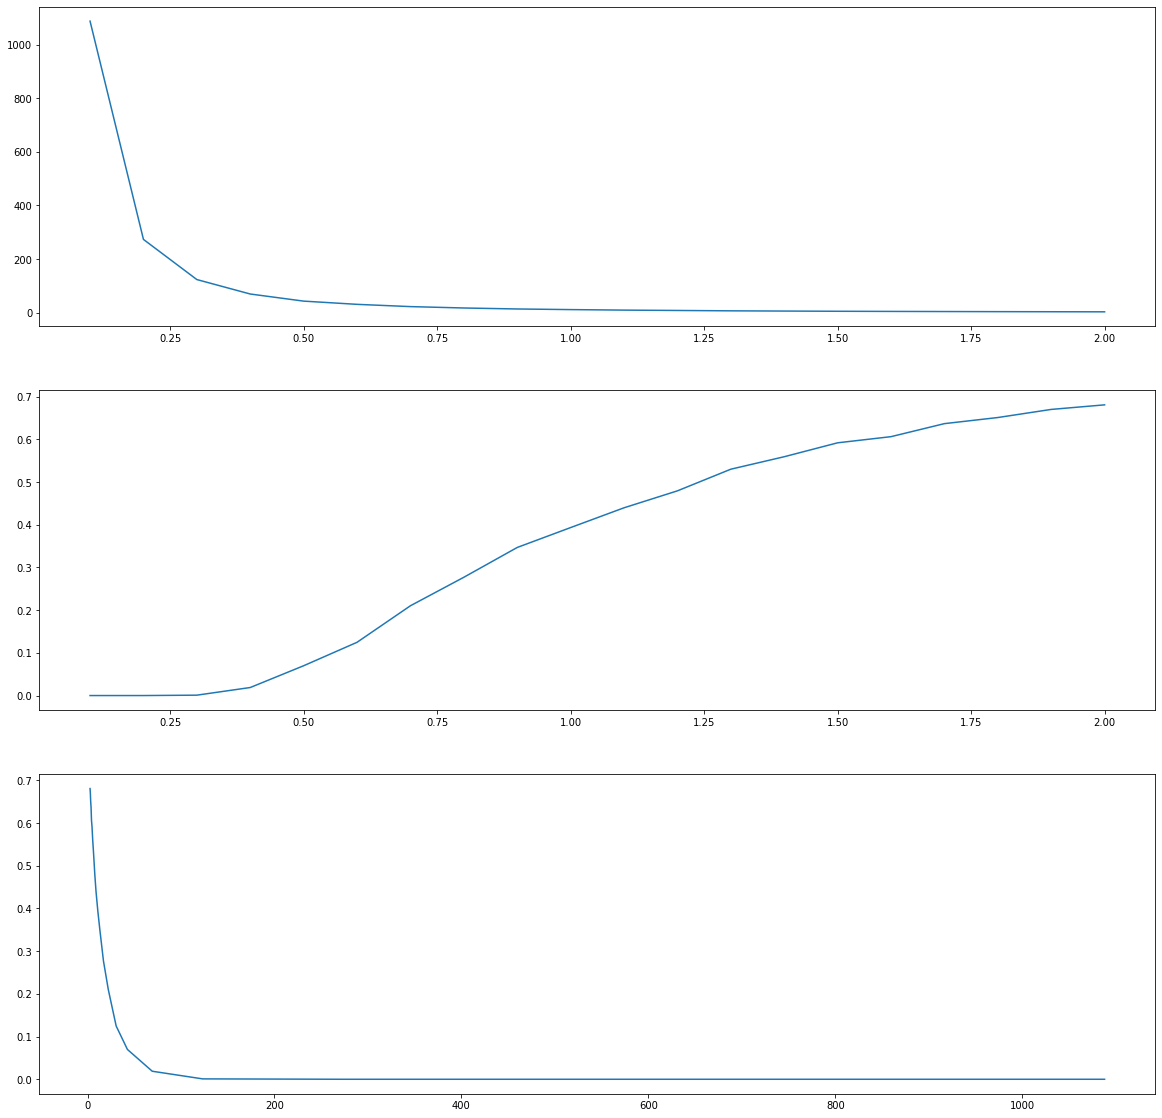

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, ber_arr)

plt.subplot(313)
plt.plot(snr_arr, ber_arr)

## 64-QAM

In [ ]:
num_symbs = 64

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

t_bit_num = np.int32(bits_per_symbol * t_symb_num)
print(f"Number of random bits: {t_bit_num}")

bitstream = np.random.randint(low=0, high=2, size=(t_bit_num, ))
print(f"Length of bitstream: {len(bitstream)}")

# for square QAM
x_pts = 32
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

cons = [(real + 1j * img)  for real in Ami for img in Amq]
print(f"Constillations: {cons}")

Number of random bits: 60000
Length of bitstream: 60000
Constillations: [(-31-1j), (-31+1j), (-29-1j), (-29+1j), (-27-1j), (-27+1j), (-25-1j), (-25+1j), (-23-1j), (-23+1j), (-21-1j), (-21+1j), (-19-1j), (-19+1j), (-17-1j), (-17+1j), (-15-1j), (-15+1j), (-13-1j), (-13+1j), (-11-1j), (-11+1j), (-9-1j), (-9+1j), (-7-1j), (-7+1j), (-5-1j), (-5+1j), (-3-1j), (-3+1j), (-1-1j), (-1+1j), (1-1j), (1+1j), (3-1j), (3+1j), (5-1j), (5+1j), (7-1j), (7+1j), (9-1j), (9+1j), (11-1j), (11+1j), (13-1j), (13+1j), (15-1j), (15+1j), (17-1j), (17+1j), (19-1j), (19+1j), (21-1j), (21+1j), (23-1j), (23+1j), (25-1j), (25+1j), (27-1j), (27+1j), (29-1j), (29+1j), (31-1j), (31+1j)]


In [ ]:
ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta= (1/np.sqrt(2)))
print(f"BER: {ber}\nSNR: {snr}")

BER: 0.219
SNR: 342.3122210432177


In [ ]:
eta_arr = np.arange(0.1, 2.1, 0.1)
eta_arr

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
ber_arr = []
snr_arr = []
for eta in eta_arr:
  ber, snr = ber_snr(bitstream, bits_per_symbol, cons, eta)
  ber_arr.append(ber)
  snr_arr.append(snr)

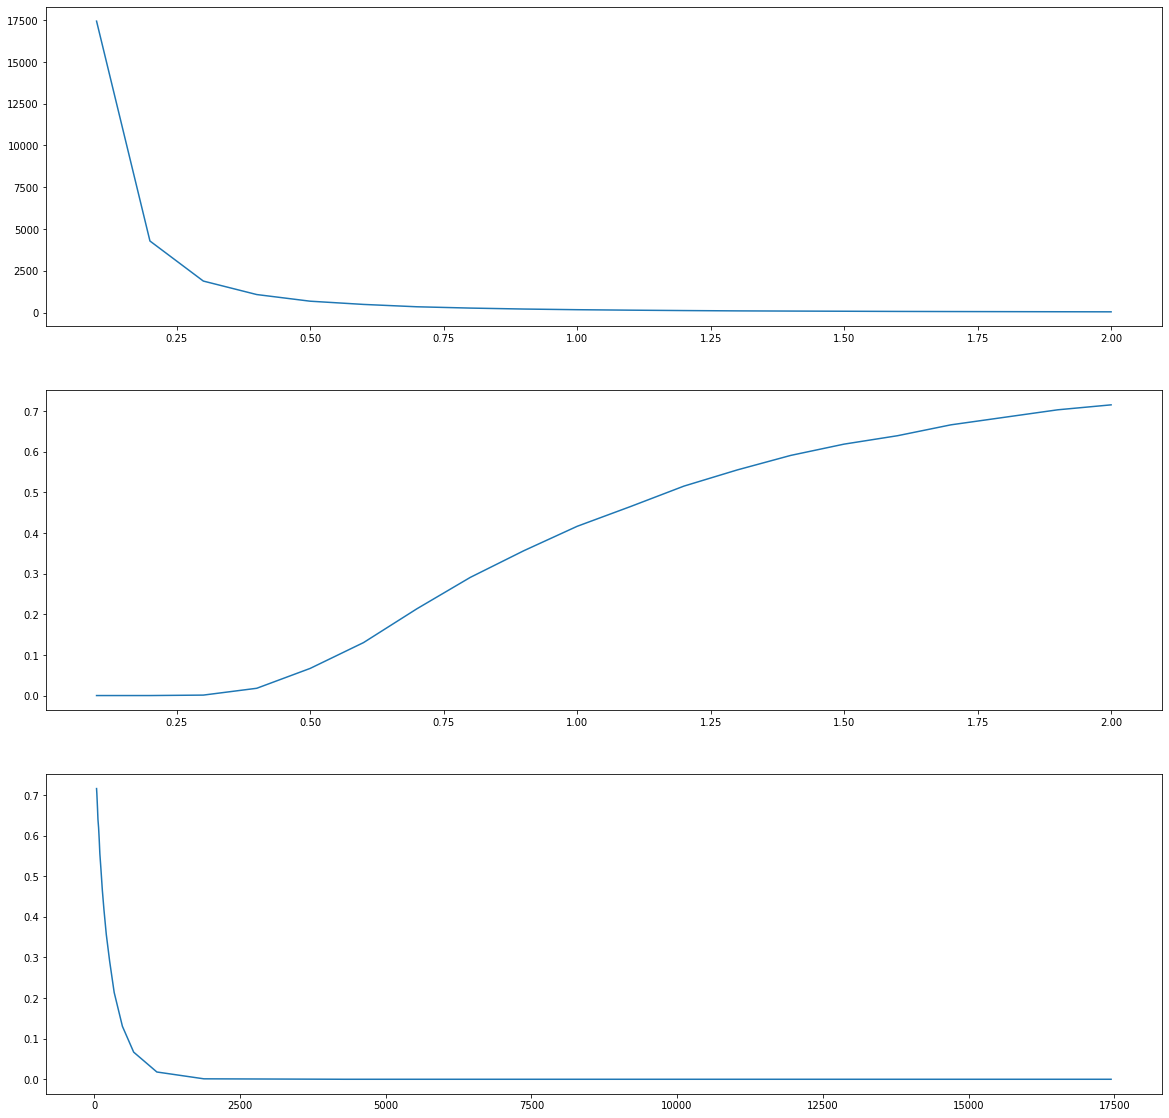

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, ber_arr)

plt.subplot(313)
plt.plot(snr_arr, ber_arr)

# Question 2
Convert an image to a stream of bits, and transmit that stream of bits via different modulation
schemes discussed in the first question. Retrieve the image and plot the PSNR as a function of the
data SNR for different transmission schemes.

In [ ]:
import matplotlib.image as mimg

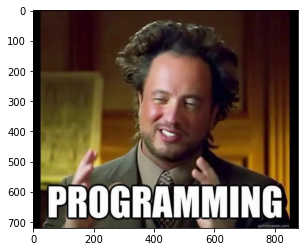

In [ ]:
img = mimg.imread("/content/maxresdefault-1.jpg", )
plt.imshow(img)

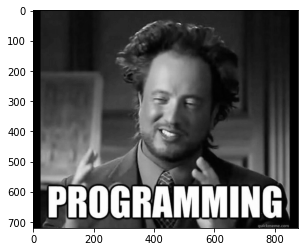

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img = np.int32(rgb2gray(img))
plt.imshow(img, cmap='gray')

In [ ]:
print(img)
img = np.concatenate(img, axis=0)
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 0 ... 0 0 0]


In [ ]:
img_min = np.min(img)
img_max = np.max(img)

img_range = img_max - img_min

bits_per_pix =  np.int32(np.round(np.log2(img_range)))
print(f"Bits needed to encode each pixel: {bits_per_pix}")

num_pix = len(img)
print(f"Number of pixels: {num_pix}")

bitstream = np.zeros(num_pix * bits_per_pix)
for i in range(0, len(bitstream),bits_per_pix):
  pixel_val = img[int(i/bits_per_pix)]
  bits = "{0:b}".format(pixel_val).zfill(bits_per_pix)
  bitstream[i:i+bits_per_pix] = np.asarray([(1 if bits[j]=='1' else 0) for j in range(len(bits))])
bitstream = np.int32(bitstream)

Bits needed to encode each pixel: 8
Number of pixels: 630720


In [ ]:
def calc_PSNR(cons, symb_stream, pred):
  peak_signal = np.max(np.square(np.abs(cons)))
  mse = np.mean(np.square(np.abs(symb_stream - pred)))
  return peak_signal/mse

In [ ]:
def psnr_snr(bitstream, bits_per_symbol,  cons, eta):
  
  sym_stream = bit_to_symbol(bitstream, bits_per_symbol, cons)
  noise = create_noise(eta, len(sym_stream))
  r = sym_stream + noise
  pred = process(r, cons)

  PSNR = calc_PSNR(cons, sym_stream, pred)

  sig_power = calc_power(cons)
  noise_power = calc_power(noise)
  SNR = sig_power/noise_power

  return PSNR, SNR

## BPSK

In [ ]:
num_symbs = 2

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Constillations: [(1+0j), (-1+1.2246467991473532e-16j)]


In [ ]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons,(1/np.sqrt(2)))

1 loop, best of 5: 1.13 s per loop


In [ ]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [289]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


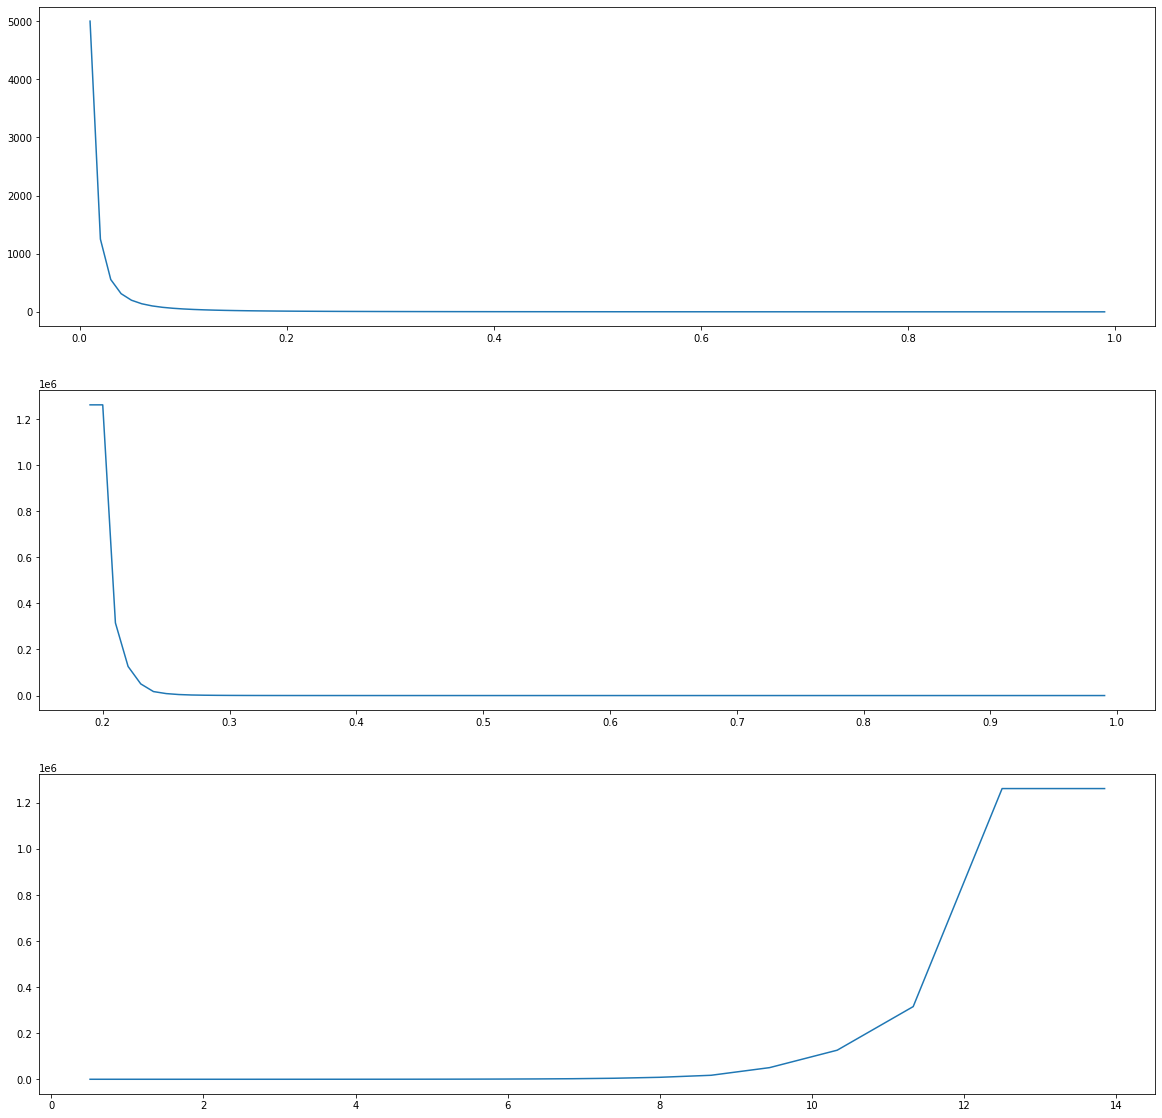

In [290]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## QPSK

In [291]:
num_symbs = 4

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Constillations: [(1+0j), (6.123233995736766e-17+1j), (-1+1.2246467991473532e-16j), (-1.8369701987210297e-16-1j)]


In [292]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

1 loop, best of 5: 778 ms per loop


In [293]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [294]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


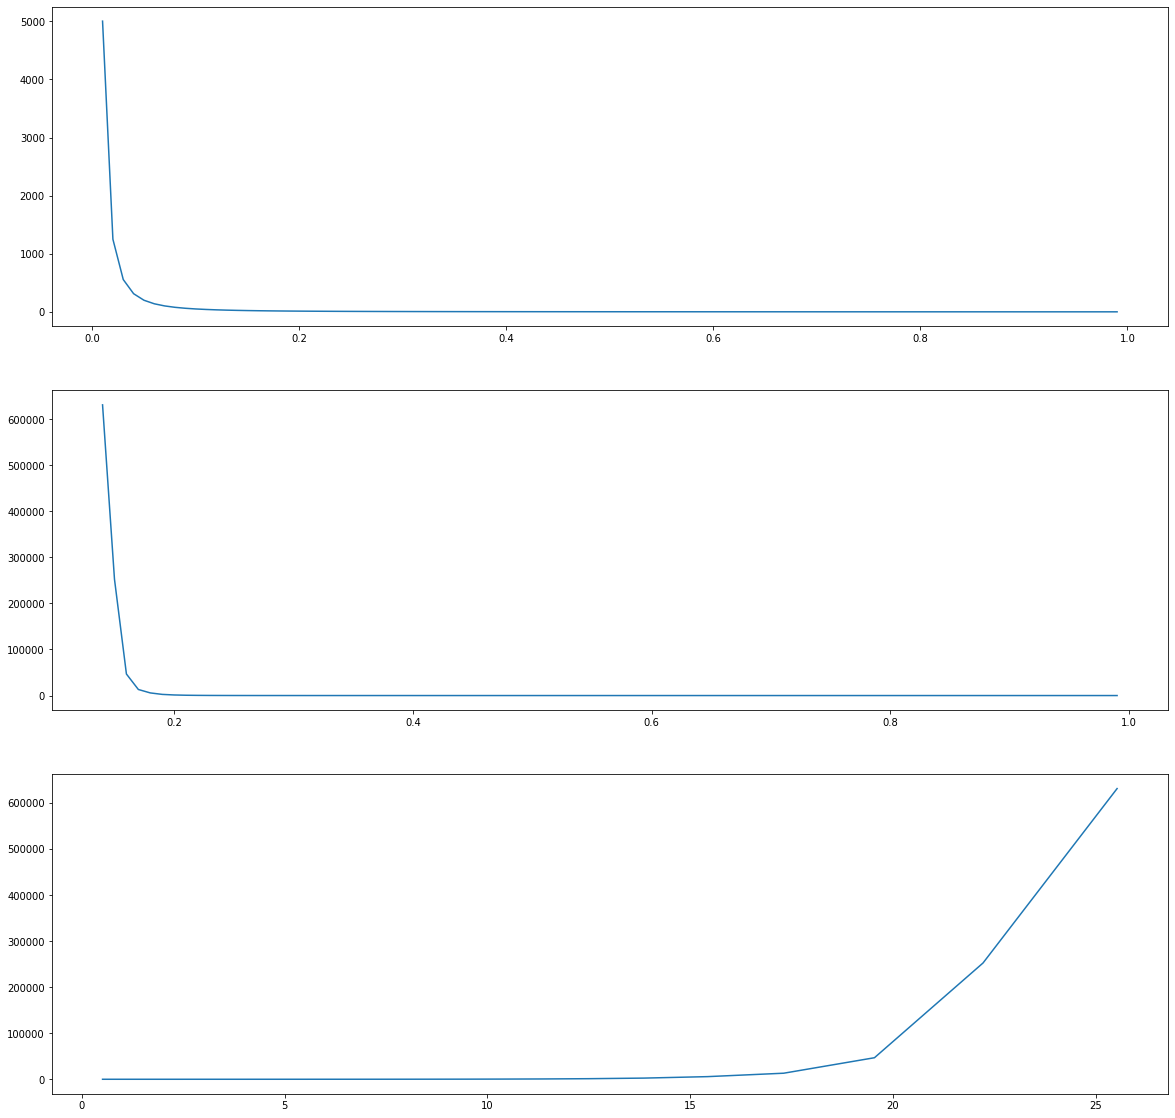

In [295]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## 8-PSK

In [296]:
num_symbs = 8

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Constillations: [(1+0j), (0.7071067811865476+0.7071067811865475j), (6.123233995736766e-17+1j), (-0.7071067811865475+0.7071067811865476j), (-1+1.2246467991473532e-16j), (-0.7071067811865477-0.7071067811865475j), (-1.8369701987210297e-16-1j), (0.7071067811865474-0.7071067811865477j)]


In [297]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

1 loop, best of 5: 755 ms per loop


In [298]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [299]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


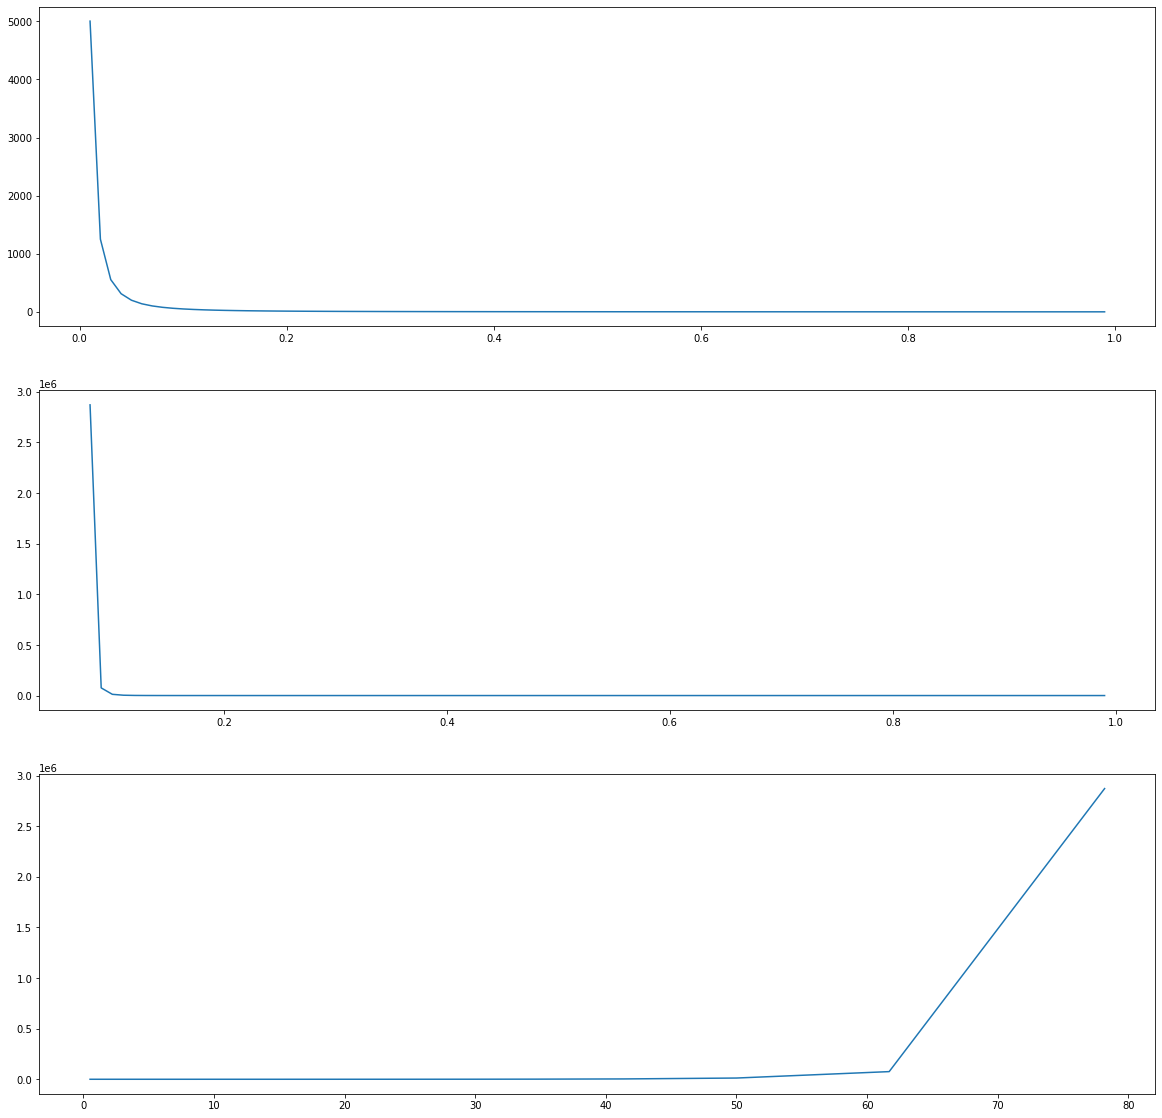

In [300]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## 16-QAM

In [301]:
num_symbs = 16

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

# for square QAM
x_pts = 8
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

cons = [(real + 1j * img)  for real in Ami for img in Amq]
print(f"Constillations: {cons}")

Constillations: [(-7-1j), (-7+1j), (-5-1j), (-5+1j), (-3-1j), (-3+1j), (-1-1j), (-1+1j), (1-1j), (1+1j), (3-1j), (3+1j), (5-1j), (5+1j), (7-1j), (7+1j)]


In [302]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

1 loop, best of 5: 769 ms per loop


In [303]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [304]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


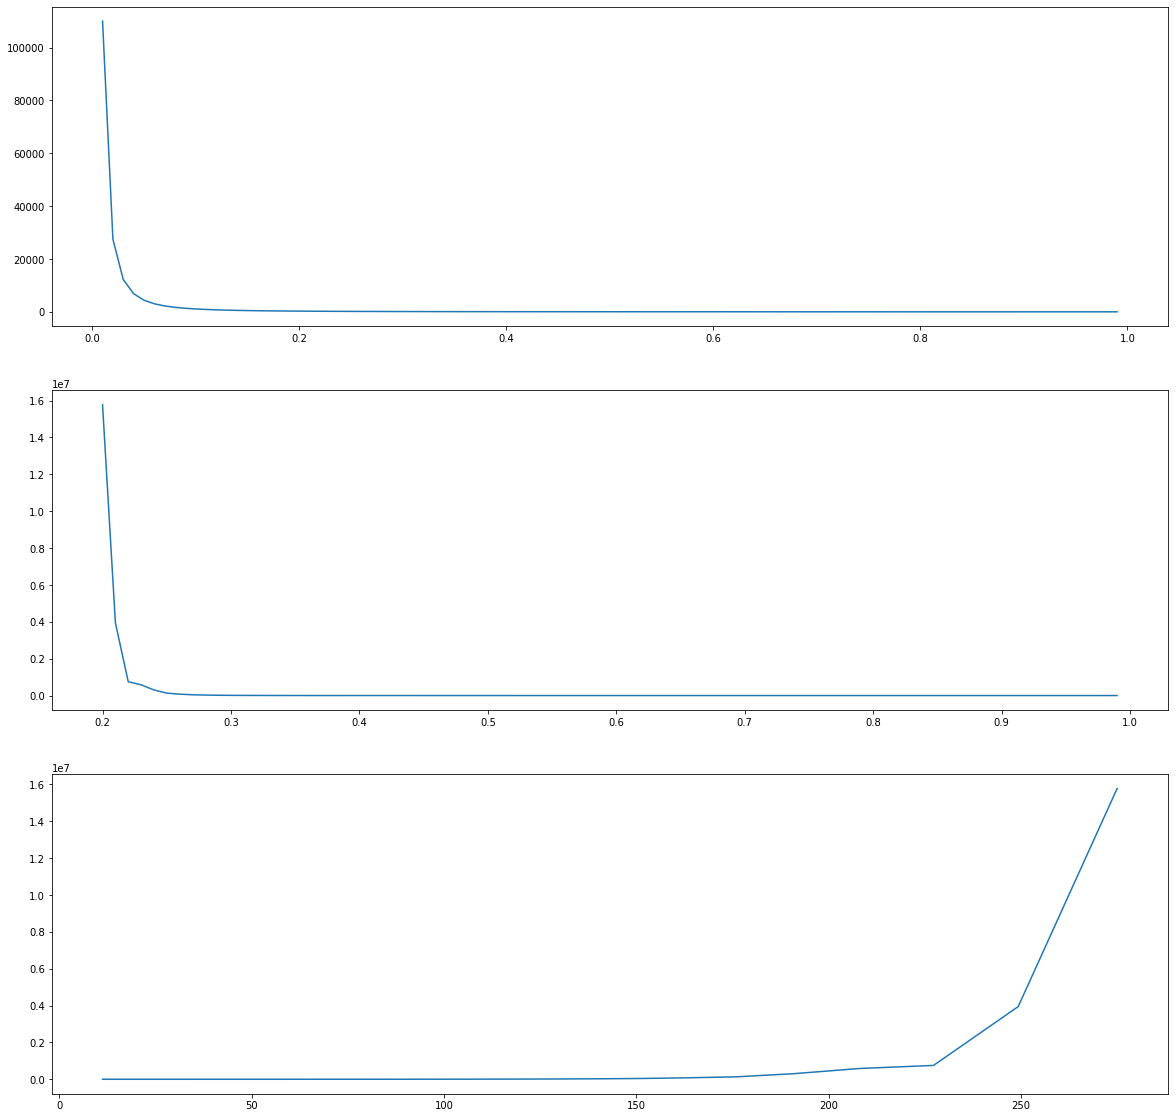

In [305]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## 64-QAM

In [306]:
num_symbs = 64

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

# for square QAM
x_pts = 32
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

cons = [(real + 1j * img)  for real in Ami for img in Amq]
print(f"Constillations: {cons}")

Constillations: [(-31-1j), (-31+1j), (-29-1j), (-29+1j), (-27-1j), (-27+1j), (-25-1j), (-25+1j), (-23-1j), (-23+1j), (-21-1j), (-21+1j), (-19-1j), (-19+1j), (-17-1j), (-17+1j), (-15-1j), (-15+1j), (-13-1j), (-13+1j), (-11-1j), (-11+1j), (-9-1j), (-9+1j), (-7-1j), (-7+1j), (-5-1j), (-5+1j), (-3-1j), (-3+1j), (-1-1j), (-1+1j), (1-1j), (1+1j), (3-1j), (3+1j), (5-1j), (5+1j), (7-1j), (7+1j), (9-1j), (9+1j), (11-1j), (11+1j), (13-1j), (13+1j), (15-1j), (15+1j), (17-1j), (17+1j), (19-1j), (19+1j), (21-1j), (21+1j), (23-1j), (23+1j), (25-1j), (25+1j), (27-1j), (27+1j), (29-1j), (29+1j), (31-1j), (31+1j)]


In [307]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

1 loop, best of 5: 1.51 s per loop


In [308]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [309]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


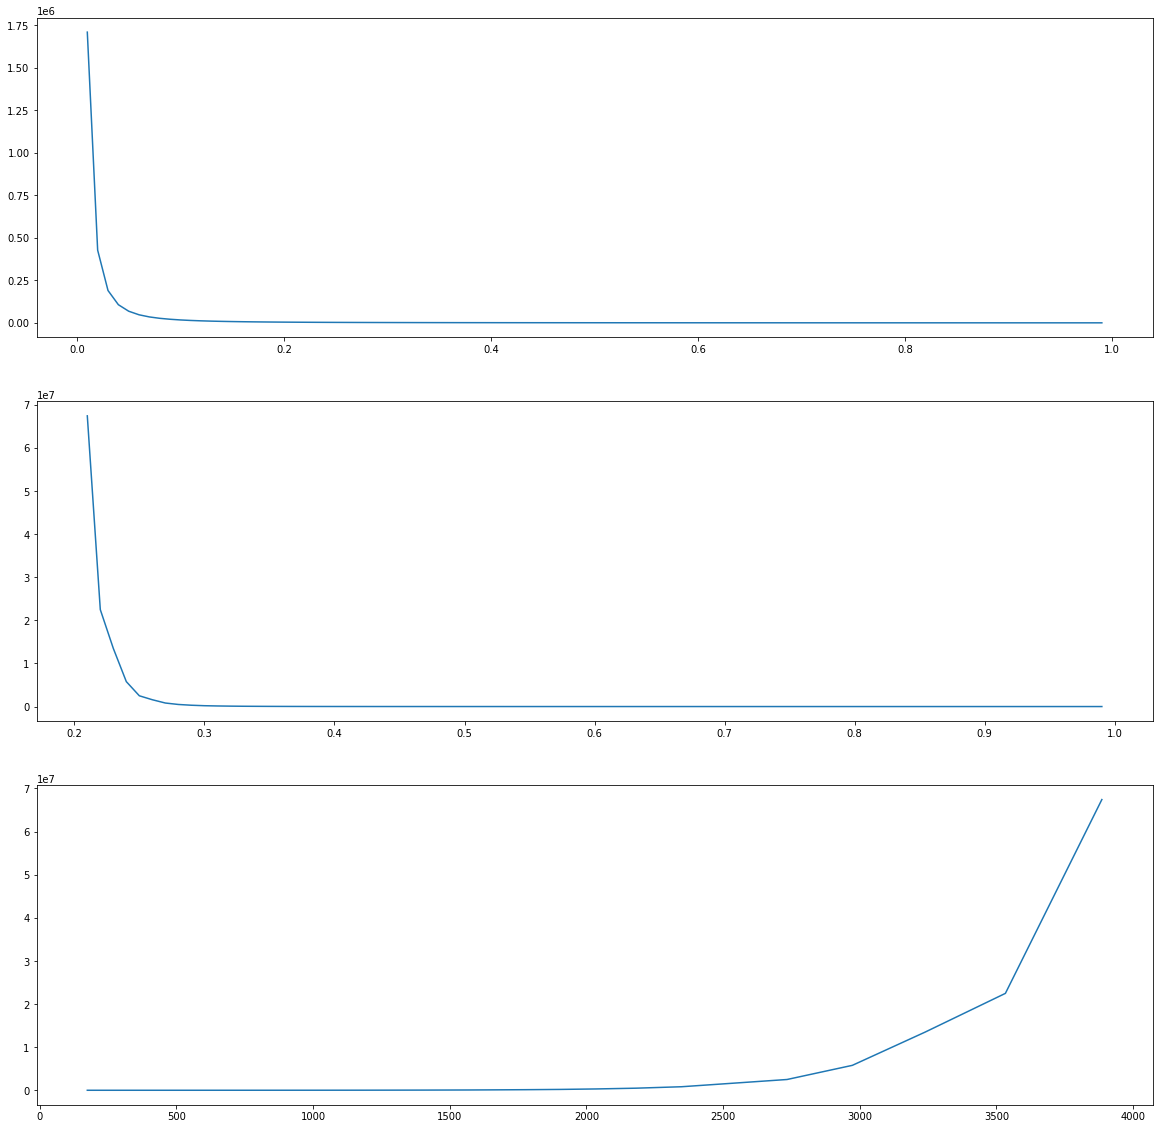

In [310]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

# Question 3

Repeat Question 2, but now use an audio file, and try calculating the SNR of recovered signal.

In [361]:
from scipy.io import wavfile

In [362]:
rate, signal = wavfile.read("sound_file_lab_2.wav")
signal = signal[:,0]
rate

48000

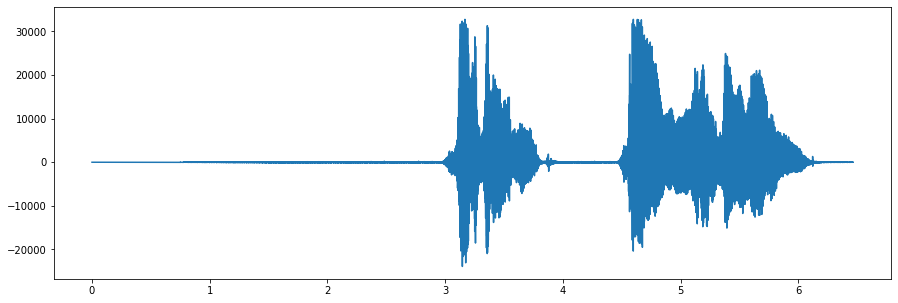

In [363]:
 t = np.arange(0,len(signal)/rate, 1/rate)
 t = t[:-1]
 plt.figure(figsize = (15,5))
 plt.plot(t, signal)

## Preprocessing

In [364]:
def myquant(x,L, mode= 'avg'):
  x =  np.asarray(x, dtype=np.float32)
  min_x = min(x)
  max_x = max(x)
  
  lvls = np.linspace(min_x,max_x,num=L)
  y = []
  encoded = []

  for val in x:
    i = np.argmax(val <= lvls)
    
    if mode == 'avg': 
      y.append(((lvls[i]+lvls[i-1])/2) if i>0 else min_x)
      encoded.append(i if i>0 else 0)
    elif mode == 'min':
      y.append(lvls[i-1] if i>0 else min_x)
      encoded.append(i if i>0 else 0)
    
  
  return {"levels":lvls, "output":y, 'encoded':encoded}

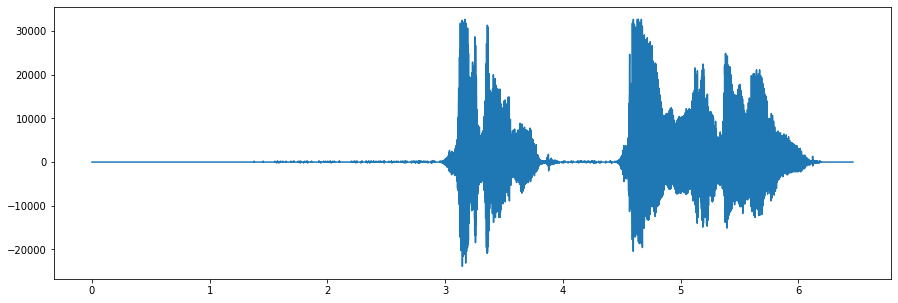

In [365]:
output_dict = myquant(signal, 256)
plt.figure(figsize=(15,5))
plt.plot(t, output_dict['output'])

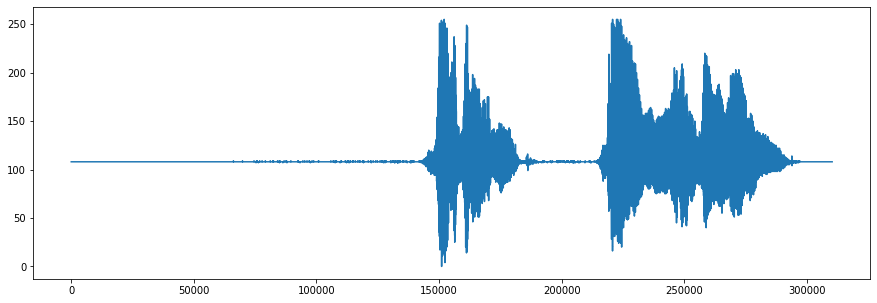

In [366]:
encoded_sig = output_dict['encoded']
plt.figure(figsize=(15,5))
plt.plot(encoded_sig)

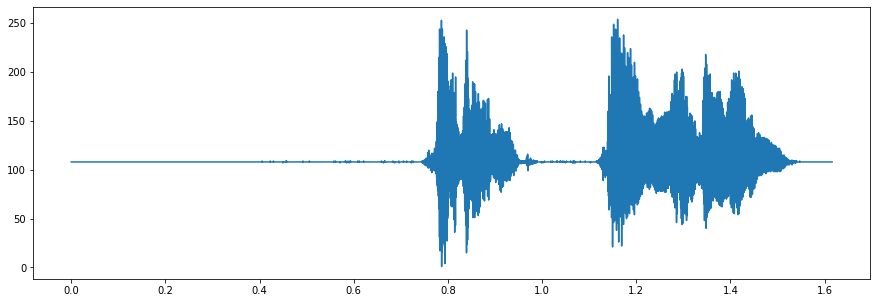

In [368]:
req_rate = 12000
sample_rate = rate//req_rate
encoded_sig = encoded_sig[::sample_rate]
t = np.arange(0,len(encoded_sig)/req_rate,1/req_rate)
t = t[:-1]
plt.figure(figsize=(15,5))
plt.plot(t, encoded_sig)

## Converting to Bitstream

In [369]:
sig_min = np.min(encoded_sig)
sig_max = np.max(encoded_sig)

sig_range = sig_max - sig_min

bits_per_val =  np.int32(np.round(np.log2(img_range)))
print(f"Bits needed to encode each pixel: {bits_per_val}")

num_vals = len(encoded_sig)
print(f"Number of Values: {num_vals}")

bitstream = np.zeros(num_vals * bits_per_val)
for i in range(0, len(bitstream),bits_per_val):
  sig_val = encoded_sig[int(i/bits_per_val)]
  bits = "{0:b}".format(pixel_val).zfill(bits_per_val)
  bitstream[i:i+bits_per_val] = np.asarray([(1 if bits[j]=='1' else 0) for j in range(len(bits))])
bitstream = np.int32(bitstream)
print(bitstream)

Bits needed to encode each pixel: 8
Number of Values: 19392
[0 0 0 ... 0 0 0]


## BPSK

In [370]:
num_symbs = 2

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Constillations: [(1+0j), (-1+1.2246467991473532e-16j)]


In [371]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons,(1/np.sqrt(2)))

10 loops, best of 5: 36.4 ms per loop


In [372]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [373]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


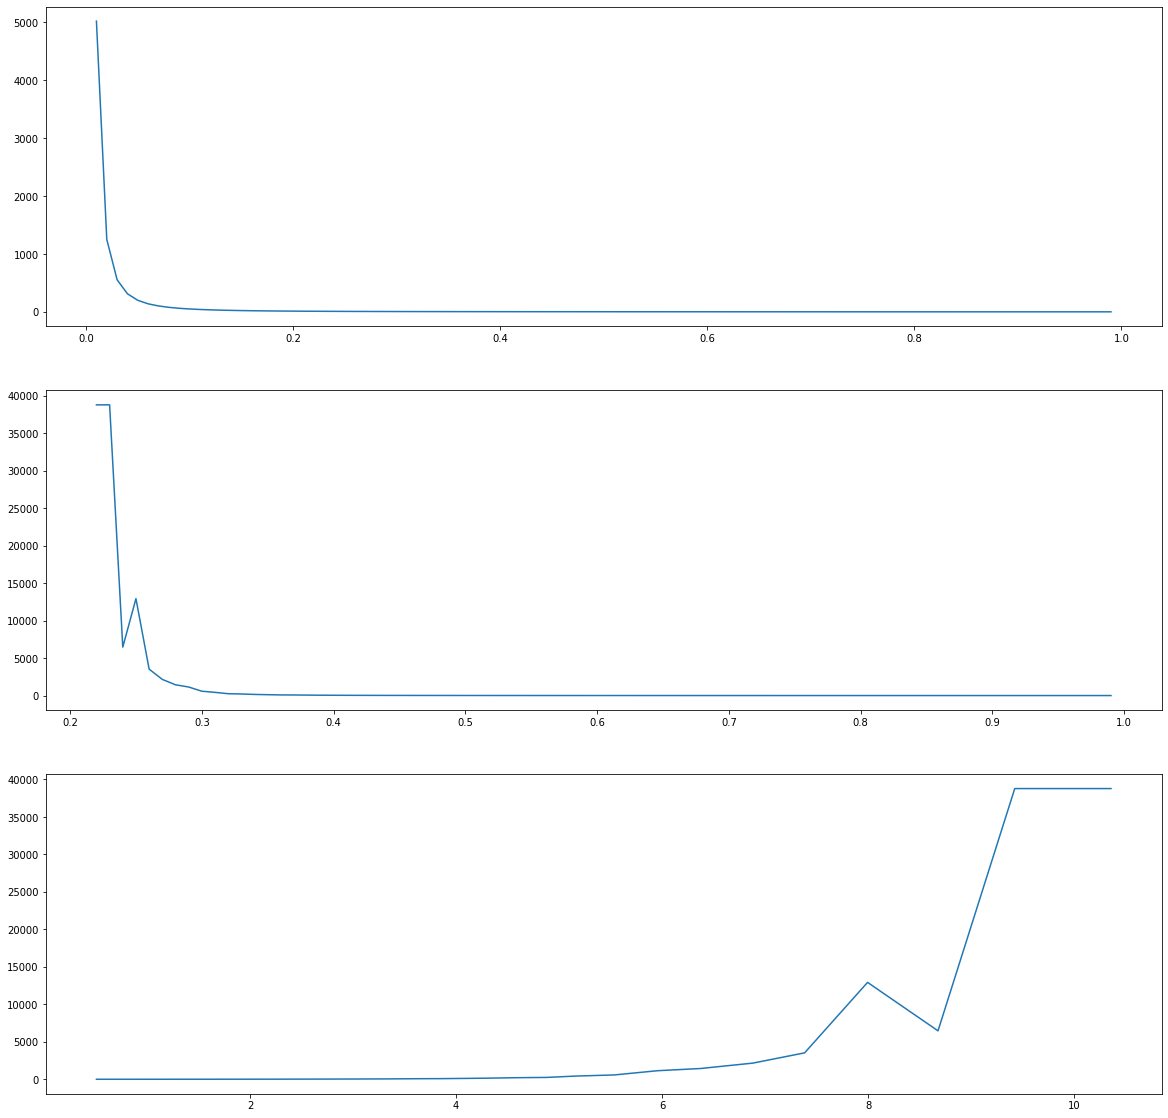

In [374]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## QPSK

In [375]:
num_symbs = 4

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Constillations: [(1+0j), (6.123233995736766e-17+1j), (-1+1.2246467991473532e-16j), (-1.8369701987210297e-16-1j)]


In [376]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

10 loops, best of 5: 24.9 ms per loop


In [377]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [378]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


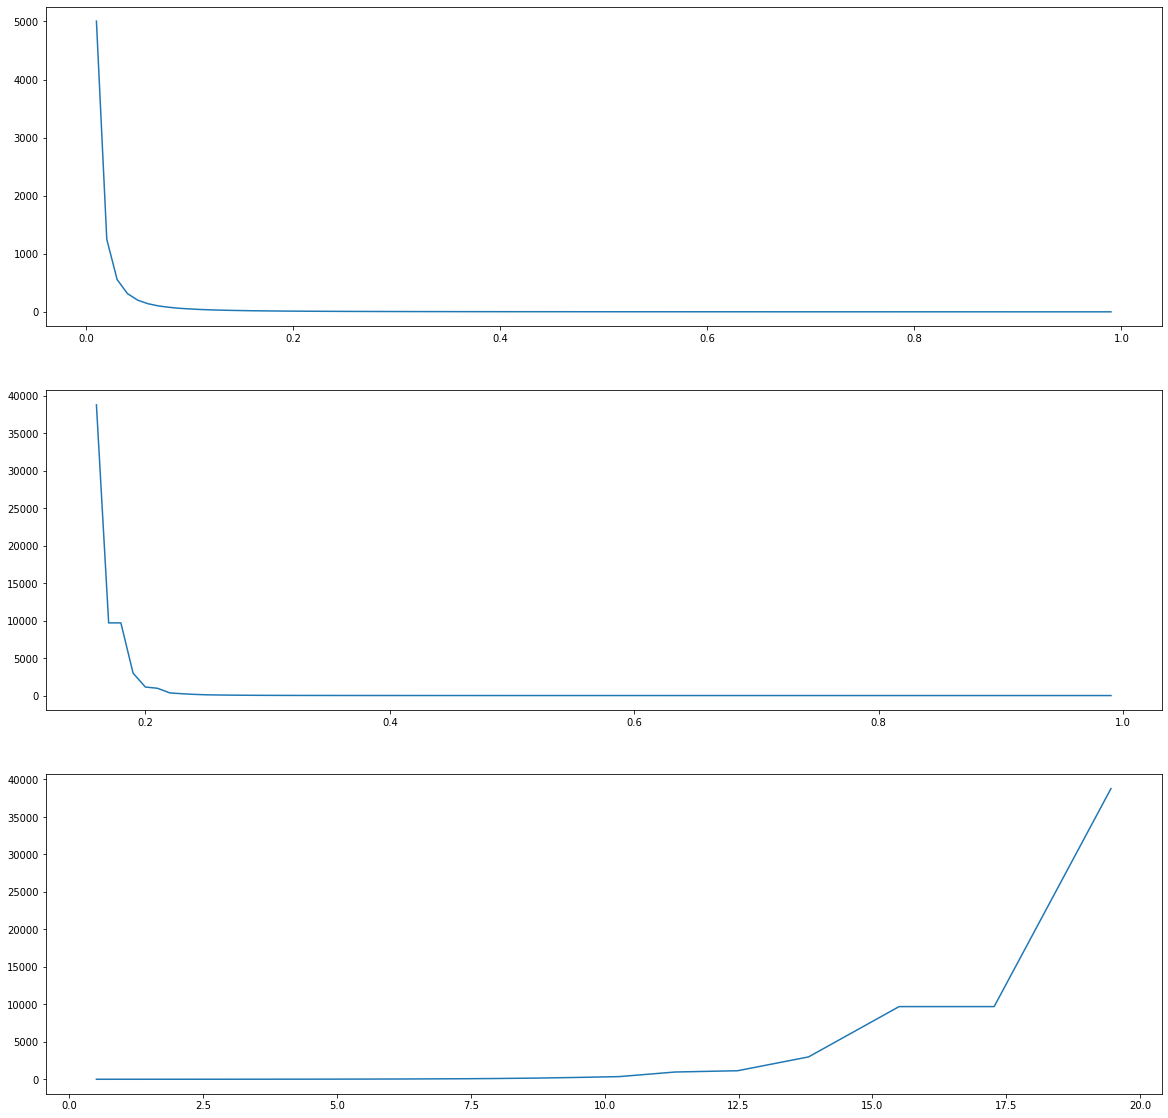

In [379]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## 8-PSK

In [380]:
num_symbs = 8

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

angles = [2*np.pi*(m/num_symbs) for m in range(num_symbs)]

cons = [np.exp(1j*theta) for theta in angles]
print(f"Constillations: {cons}")

Constillations: [(1+0j), (0.7071067811865476+0.7071067811865475j), (6.123233995736766e-17+1j), (-0.7071067811865475+0.7071067811865476j), (-1+1.2246467991473532e-16j), (-0.7071067811865477-0.7071067811865475j), (-1.8369701987210297e-16-1j), (0.7071067811865474-0.7071067811865477j)]


In [381]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

10 loops, best of 5: 24.1 ms per loop


In [382]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [383]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


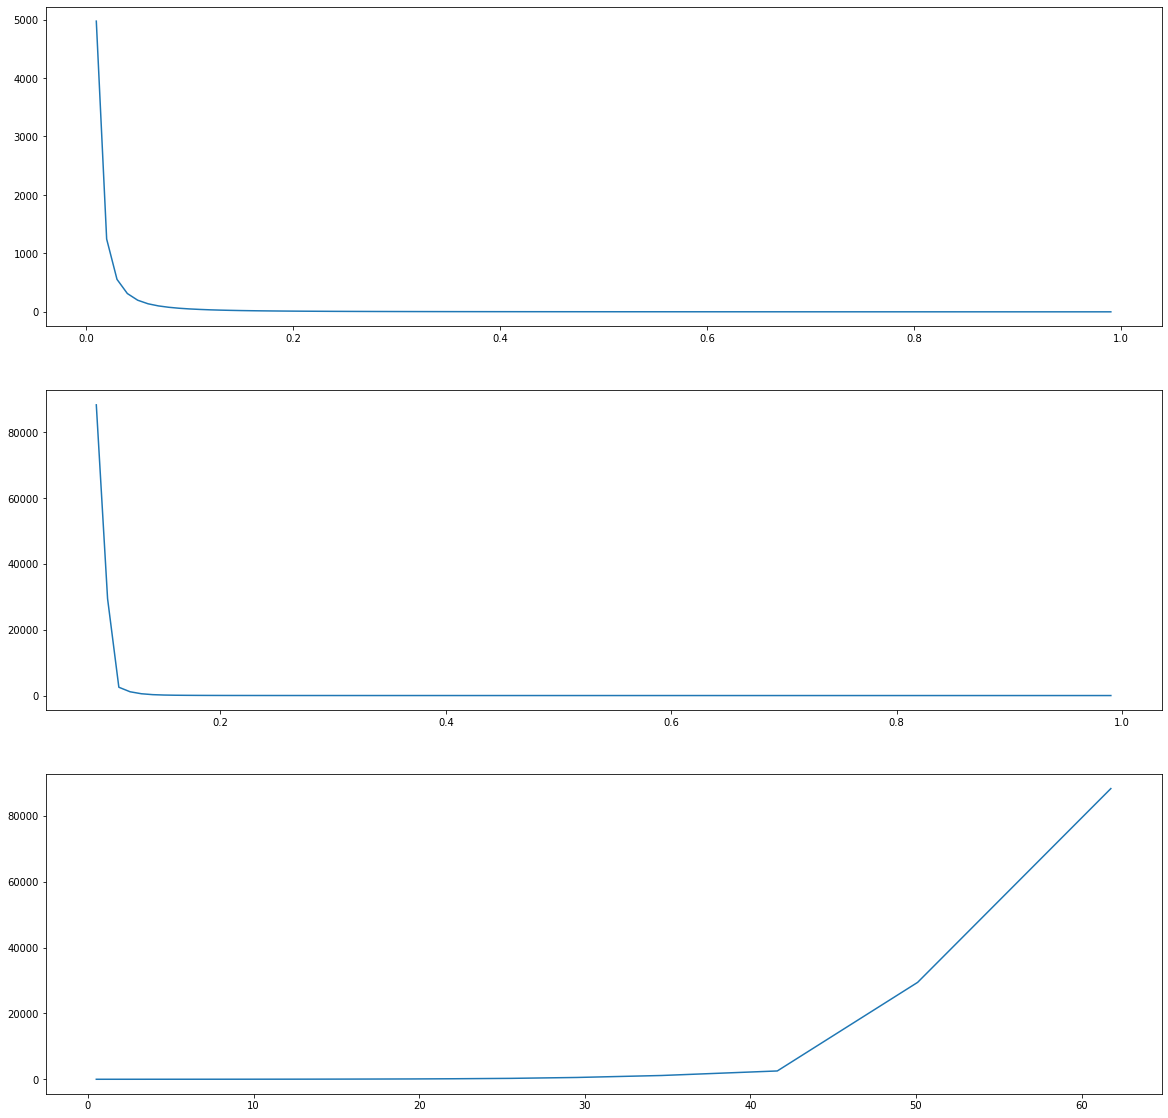

In [384]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## 16-QAM

In [385]:
num_symbs = 16

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

# for square QAM
x_pts = 8
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

cons = [(real + 1j * img)  for real in Ami for img in Amq]
print(f"Constillations: {cons}")

Constillations: [(-7-1j), (-7+1j), (-5-1j), (-5+1j), (-3-1j), (-3+1j), (-1-1j), (-1+1j), (1-1j), (1+1j), (3-1j), (3+1j), (5-1j), (5+1j), (7-1j), (7+1j)]


In [386]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

10 loops, best of 5: 22.6 ms per loop


In [387]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [388]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


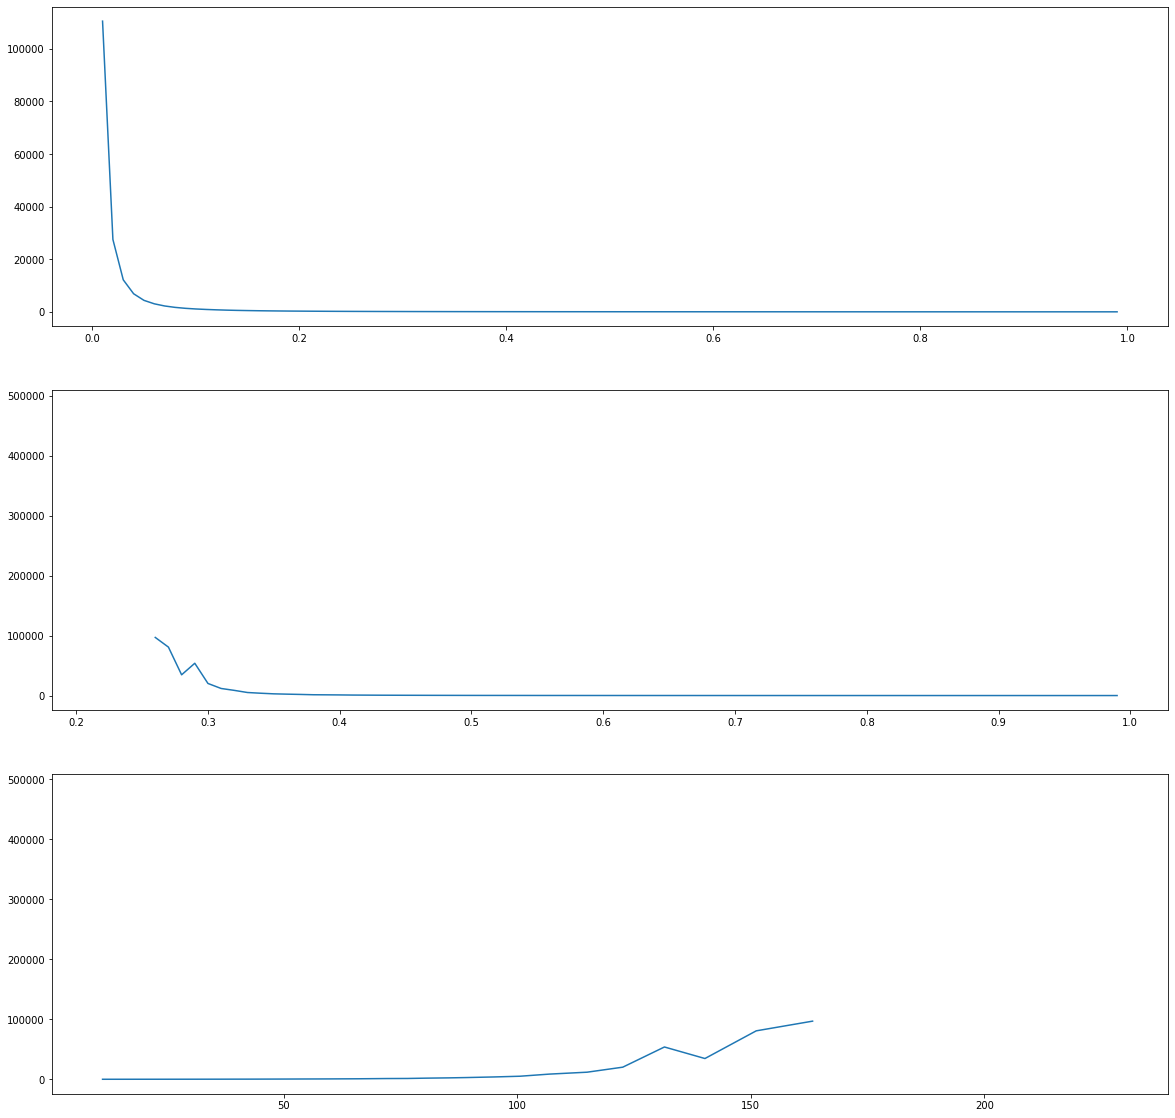

In [389]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)

## 64-QAM

In [390]:
num_symbs = 64

bits_per_symbol = np.int32(np.round(np.log2(num_symbs)))

# for square QAM
x_pts = 32
y_pts = 2

Ami = np.asarray( [2*i - (x_pts - 1) for i in range((x_pts))] )
Amq = np.asarray( [2*i - (y_pts - 1) for i in range(y_pts)] )

cons = [(real + 1j * img)  for real in Ami for img in Amq]
print(f"Constillations: {cons}")

Constillations: [(-31-1j), (-31+1j), (-29-1j), (-29+1j), (-27-1j), (-27+1j), (-25-1j), (-25+1j), (-23-1j), (-23+1j), (-21-1j), (-21+1j), (-19-1j), (-19+1j), (-17-1j), (-17+1j), (-15-1j), (-15+1j), (-13-1j), (-13+1j), (-11-1j), (-11+1j), (-9-1j), (-9+1j), (-7-1j), (-7+1j), (-5-1j), (-5+1j), (-3-1j), (-3+1j), (-1-1j), (-1+1j), (1-1j), (1+1j), (3-1j), (3+1j), (5-1j), (5+1j), (7-1j), (7+1j), (9-1j), (9+1j), (11-1j), (11+1j), (13-1j), (13+1j), (15-1j), (15+1j), (17-1j), (17+1j), (19-1j), (19+1j), (21-1j), (21+1j), (23-1j), (23+1j), (25-1j), (25+1j), (27-1j), (27+1j), (29-1j), (29+1j), (31-1j), (31+1j)]


In [391]:
%timeit psnr_snr(bitstream, bits_per_symbol, cons, (1/np.sqrt(2)))

10 loops, best of 5: 43.6 ms per loop


In [392]:
eta_arr = np.arange(0.01, 1., 0.01)
eta_arr

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [393]:
psnr_arr = []
snr_arr = []
for eta in eta_arr:
  psnr, snr = psnr_snr(bitstream, bits_per_symbol, cons, eta)
  psnr_arr.append(psnr)
  snr_arr.append(snr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


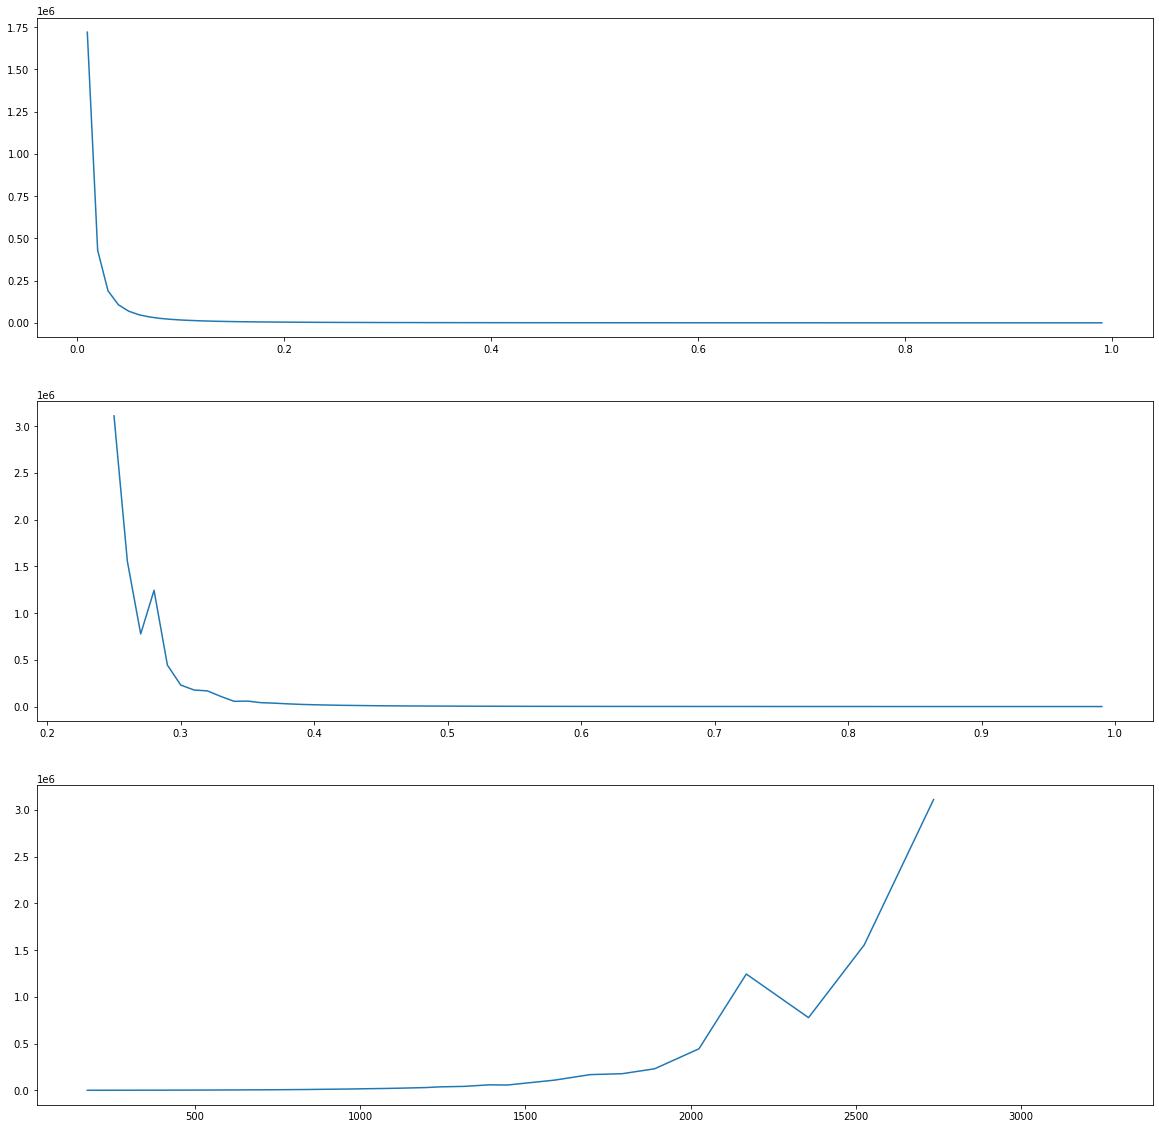

In [394]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.plot(eta_arr, snr_arr)

plt.subplot(312)
plt.plot(eta_arr, psnr_arr)

plt.subplot(313)
plt.plot(snr_arr, psnr_arr)